In [ ]:
import tensorflow as tf # Libreria para IA hecha por google
import numpy as np # Libreria para hacer operaciones matematicas

In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40,14,32,46,59,72,100], dtype=float)

In [ ]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelo.compile(
    optimizer= tf.keras.optimizers.Adam(0.1), ## optimizador que permite que la red aprenda y no desaprenda
    loss='mean_squared_error' #funcion de perdida, una poca cantidad de errores grandes es peor que una gran cantidad de errores pequeños

)

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False) #Entrenamos el modelo, verbose en false no muestra mugrero de letras dciendo que entrena
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


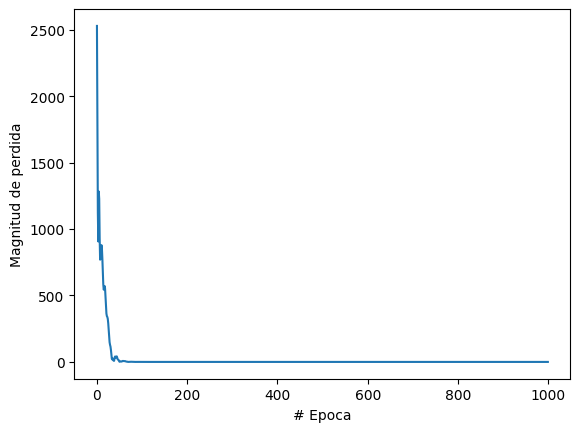

In [ ]:
import matplotlib.pyplot as plt #Libreria para graficar
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])
#

Mientras mas vueltas el error iba rebajando

In [ ]:
print ("Hagamos una prediccion!")
resultado = modelo.predict(np.array([100.0])) # Convert the input to a NumPy array
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una prediccion!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
El resultado es [[211.74745]] fahrenheit!


In [ ]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.05746024,  0.58369416, -0.37027895]], dtype=float32), array([-3.0773895,  3.7065141, -3.665039 ], dtype=float32)]
[array([[ 1.2280138 , -0.69080144, -0.05497878],
       [-0.91053563, -0.49542788,  0.7132214 ],
       [ 0.76088595, -0.4573894 , -1.2758188 ]], dtype=float32), array([-3.6443946,  2.8962104,  3.7444096], dtype=float32)]
[array([[-1.2455276 ],
       [ 0.47237825],
       [ 0.8241436 ]], dtype=float32), array([3.475027], dtype=float32)]


#REDES CONVOLUCIONALES (Clasificador de imagenes)

Regresion= La salida del modelo es un numero, valor o algo, por ejemplo elegir una casa segun sus metros o años

Clasificación= cada categoria es una neurona necesaria

La mas utilizada es la red convolucional para la clasificación

Herramientas son las capas ocultas y la funcion de activación por que cada neurona solo realiza un proceso lineal

Funcion de activación= modifica la funcion luego de cada neurona para limitar mejor nuestro ejercicio

ReLu= Por ejemplo no coge ningun valor negativo por que lo deja en 0 el resto como esten



In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds # me permite descargar datasets facilmente como esta de zalando

In [ ]:
datos,metadatos=tfds.load('fashion_mnist',as_supervised=True,with_info=True)

In [ ]:
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    =

In [ ]:
datos_entrenamiento, datos_pruebas=datos['train'],datos['test']

In [ ]:
nombre_clases = metadatos.features['label'].names
nombre_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#Normalizar
Actualmente estan entre 0 y 255 los valores, haremos que esten entre 0 y 1

In [ ]:
def normalizar(imagenes,etiquetas):
  imagenes=tf.cast(imagenes,tf.float32)
  imagenes/=255 # Aqui se pasa de 0 -255 a 0-1
  return imagenes,etiquetas

  #Aplicar esta funcion a todo el dataset
datos_entrenamiento=datos_entrenamiento.map(normalizar)
datos_pruebas=datos_pruebas.map(normalizar)

#agregar a cache ( usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento=datos_entrenamiento.cache()
datos_pruebas=datos_pruebas.cache()

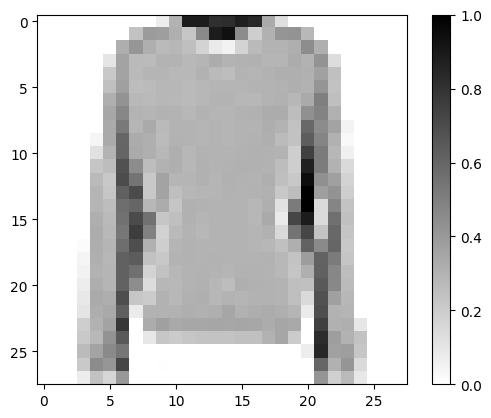

In [ ]:
#Mostrar una imagen de los datos de prueba, de momento mostremos la primera
for imagen,etiqueta in datos_entrenamiento.take(1):
  break
imagen=imagen.numpy().reshape((28,28)) #Redimensionar la imagen

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(imagen,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

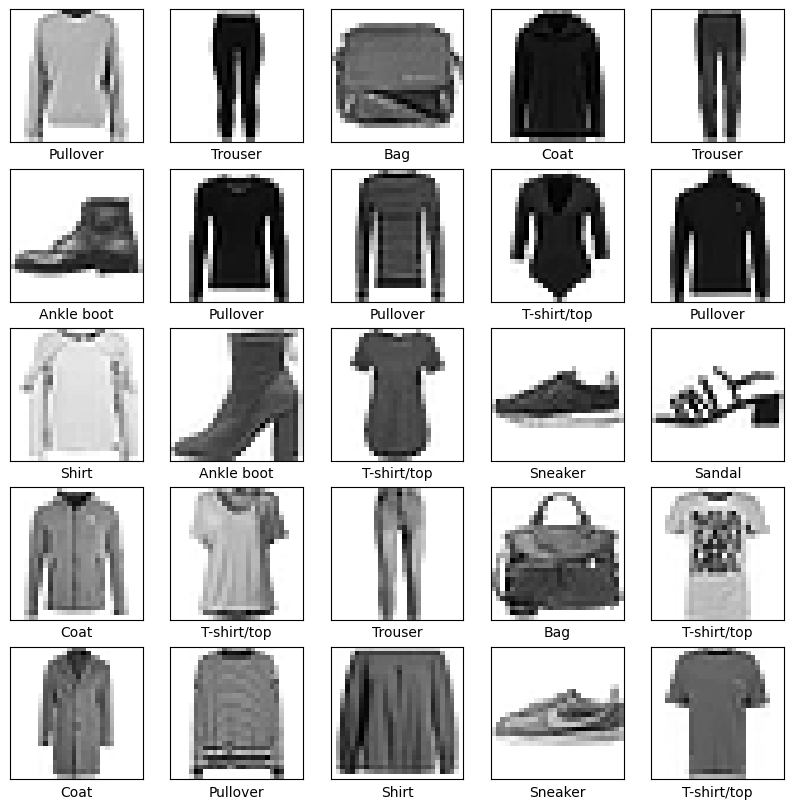

In [ ]:
plt.figure(figsize=(10,10))
for i,(imagen,etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen=imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen,cmap=plt.cm.binary)
  plt.xlabel(nombre_clases[etiqueta])
plt.show()

In [ ]:
#crear el modelo

modelo=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - blanco y negro Flatten aplasta la matriz a una sola dimension
  tf.keras.layers.Dense(50,activation=tf.nn.relu), #Neurona capa oculta densas con activacion ReLu
  tf.keras.layers.Dense(50,activation=tf.nn.relu),
  tf.keras.layers.Dense(10,activation=tf.nn.softmax) #Funcion softmax para capas de salida para redes de clasificacion, para asegurar que las suma de las neuronas de salida siempre de 1
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#copilar modelo

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
num_ej_entrenamiento=metadatos.splits["train"].num_examples
num_ej_pruebas=metadatos.splits["test"].num_examples
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [ ]:
TAMANO_LOTE=32
datos_entrenamiento=datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas=datos_pruebas.batch(TAMANO_LOTE)
#

In [ ]:
import math
#entrenar
historial=modelo.fit(datos_entrenamiento,epochs=10,steps_per_epoch=math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7656 - loss: 0.6703
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8590 - loss: 0.3929
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8727 - loss: 0.3576
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8795 - loss: 0.3254
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8858 - loss: 0.3102
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8852 - loss: 0.3081
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8940 - loss: 0.2884
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8973 - loss: 0.2754
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9009 - loss: 0.2664
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9002 - loss: 0.2640


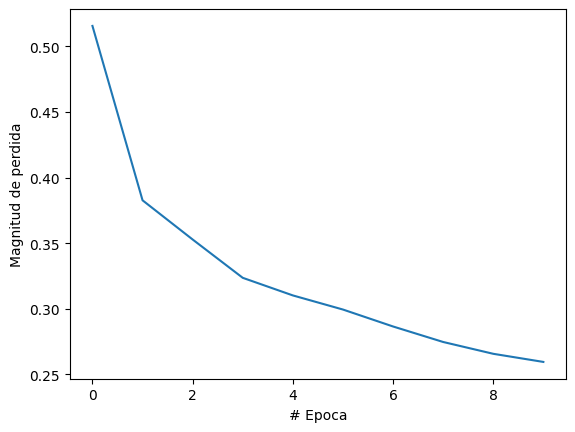

In [ ]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])
#

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


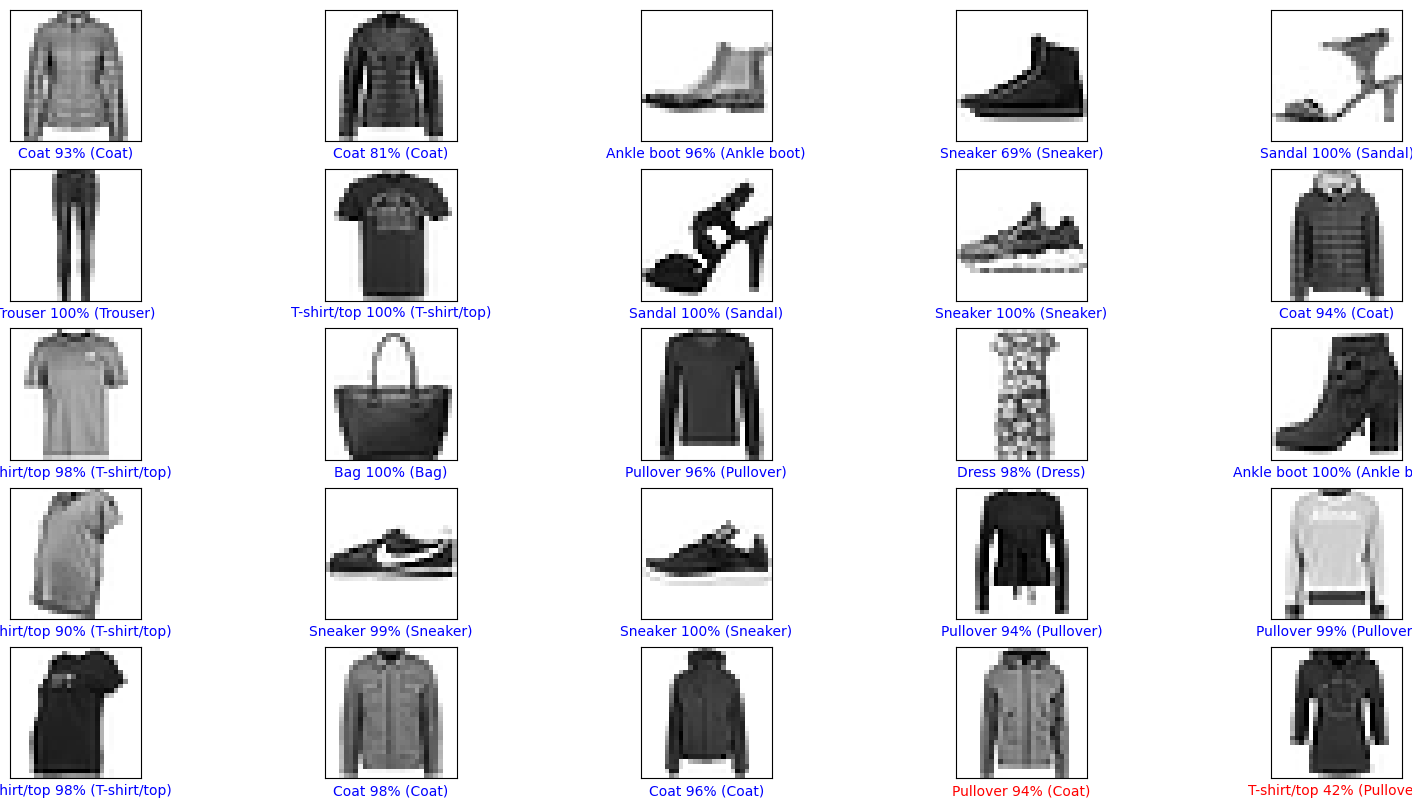

In [ ]:
import numpy as np
for imagenes_prueba,etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba=imagenes_prueba.numpy()
  etiquetas_prueba=etiquetas_prueba.numpy()
  predicciones=modelo.predict(imagenes_prueba)

  def graficar_imagen(i,arr_predicciones,etiquetas_reales,imagenes):
    arr_predicciones,etiqueta_real,img=arr_predicciones[i],etiquetas_reales[i],imagenes[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0],cmap=plt.cm.binary)
    etiqueta_prediccion=np.argmax(arr_predicciones)
    if etiqueta_prediccion==etiqueta_real:
      color="blue"
    else:
      color="red"
    plt.xlabel("{} {:2.0f}% ({})".format(nombre_clases[etiqueta_prediccion],100*np.max(arr_predicciones),nombre_clases[etiqueta_real]),color=color)

def graficar_valor_arreglo(i,arr_predicciones,etiqueta_real):
  arr_predicciones,etiqueta_real=arr_predicciones[i],etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica=plt.bar(range(10),arr_predicciones,color="#777777")
  plt.ylim([0,1])
  etiqueta_prediccion=np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas=5
columnas=5
num_imagenes=filas*columnas
plt.figure(figsize=(2*2*columnas,2*filas))

for i in range(num_imagenes):
  plt.subplot(filas,2*columnas,2*i+1)
  graficar_imagen(i,predicciones,etiquetas_prueba,imagenes_prueba)



In [ ]:
#Tomar cualquier indice del set de pruebas para ver su prediccion

imagen=imagenes_prueba[10]
imagen=np.array([imagen])
prediccion=modelo.predict(imagen)

print("Prediccion: "+nombre_clases[np.argmax(prediccion[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediccion: T-shirt/top


In [ ]:
#Exportacion del modelo
modelo.save('fashion_mnist.h5')

#EXPORTAR A TENSORFLOW PARA PAGINAS WEB

In [ ]:
#instalar tensor flow
!pip install tensorflowjs

In [ ]:
#convertir el archivo a formato de tensorflowjs
!mkdir carpeta_salida
!tensorflowjs_converter --input_format keras fashion_mnist.h5 carpeta_salida

2024-11-01 00:05:45.872451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730419545.914546   18760 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730419545.926735   18760 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


##Ejemplo grados farenheit a celsius

In [ ]:
import tensorflow as tf
import numpy as np

celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40,14,32,46,59,72,100], dtype=float)

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)

modelo = tf.keras.Sequential([oculta1, oculta2, salida])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Comenzando entrenamiento...
Modelo entrenado!


In [ ]:
resultado = modelo.predict(np.array([100.0])) # Convert the input to a NumPy array
print("Prediccion: " + str(resultado) + " fahrenheit")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Prediccion: [[211.74742]] fahrenheit


In [ ]:
#exportar elmodelo
modelo.save('celsius_a_fahrenheit.h5')

In [ ]:
!ls


carpeta_salida	celsius_a_fahrenheit.h5  fashion_mnist.h5  sample_data


In [ ]:
#crear una carpeta donde se colocara los archivos resultantes
!mkdir carpeta_salida

mkdir: cannot create directory ‘carpeta_salida’: File exists


In [ ]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras celsius_a_fahrenheit.h5 carpeta_salida

2024-11-01 00:15:55.484799: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730420155.528973   27244 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730420155.542112   27244 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
#confoirar que en la carpeta de salida se hayan generado los archivos
!ls carpeta_salida

group1-shard1of1.bin  model.json


In [ ]:
###FALTA!!!

#REDES NEURONALES

Tenemos dos capaas mas, convolucionales y de agrupacion


In [ ]:
tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.MaxPooling2D(2, 2),

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


(<MaxPooling2D name=max_pooling2d, built=True>,)

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

#Descargar set de datos de MNIST (Numeros escritos a mano etiquetados)
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

#obtener en variables separadas los datos de entrenamiento (60k) y pruebas de (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

#Funcion de normalizacion para los datos (Pasar de 0-255 a 0-1)
#(Hace que la red aprenda mejor y mas rapido)
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar los datos de entrenamiento con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)
clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

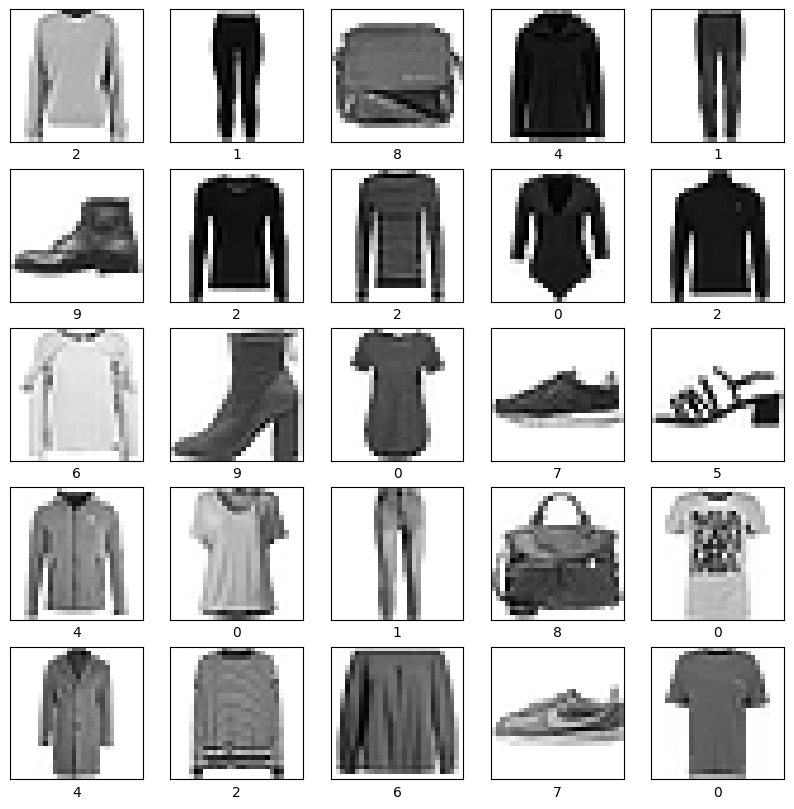

In [ ]:
plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(clases[etiqueta])

plt.show()

In [ ]:
#crear el modelo (modelo denso, regular, sinredes convolucionales tdoavia)
modelo = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - blanco y negro, aplanado
     tf.keras.layers.Dense(50, activation=tf.nn.relu), #capa oculta
     tf.keras.layers.Dense(50, activation=tf.nn.relu), #capa oculta
     tf.keras.layers.Dense(10, activation=tf.nn.softmax) #capa de salida
 ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Realizar el entrenamiento
import math

historial = modelo.fit(datos_entrenamiento, epochs=60)

ValueError: You must call `compile()` before using the model.

In [ ]:
print("HOla mundo Git hub")